# Food Recommendation System in Python



In [1]:
%%capture
!wget https://www.dropbox.com/s/gq9y0srrewg6dwn/RAW_recipes.csv?dl=0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

df = pd.read_csv("RAW_recipes.csv?dl=0")
print("Number of Recipes in the dataset : ",df.shape[0])

Number of Recipes in the dataset :  231637


In [3]:
def nutrition_value(x):
  x = x.strip('][').split(', ')
  val = 0
  for i in x:
    val+=float(i)
  return val

df['nutrition'] = df['nutrition'].apply(lambda x: nutrition_value(x))

In [4]:
#sort the recipes according to the amount of time it takes
df_sort_by_time = df.copy().sort_values('minutes',ascending=False)
most_time_dishes = df_sort_by_time[1:11]

#sort the recipes according to the nutrition value
df_sort_by_nutr = df.copy().sort_values('nutrition',ascending=False)
most_nutrition_dishes = df_sort_by_nutr[:10]

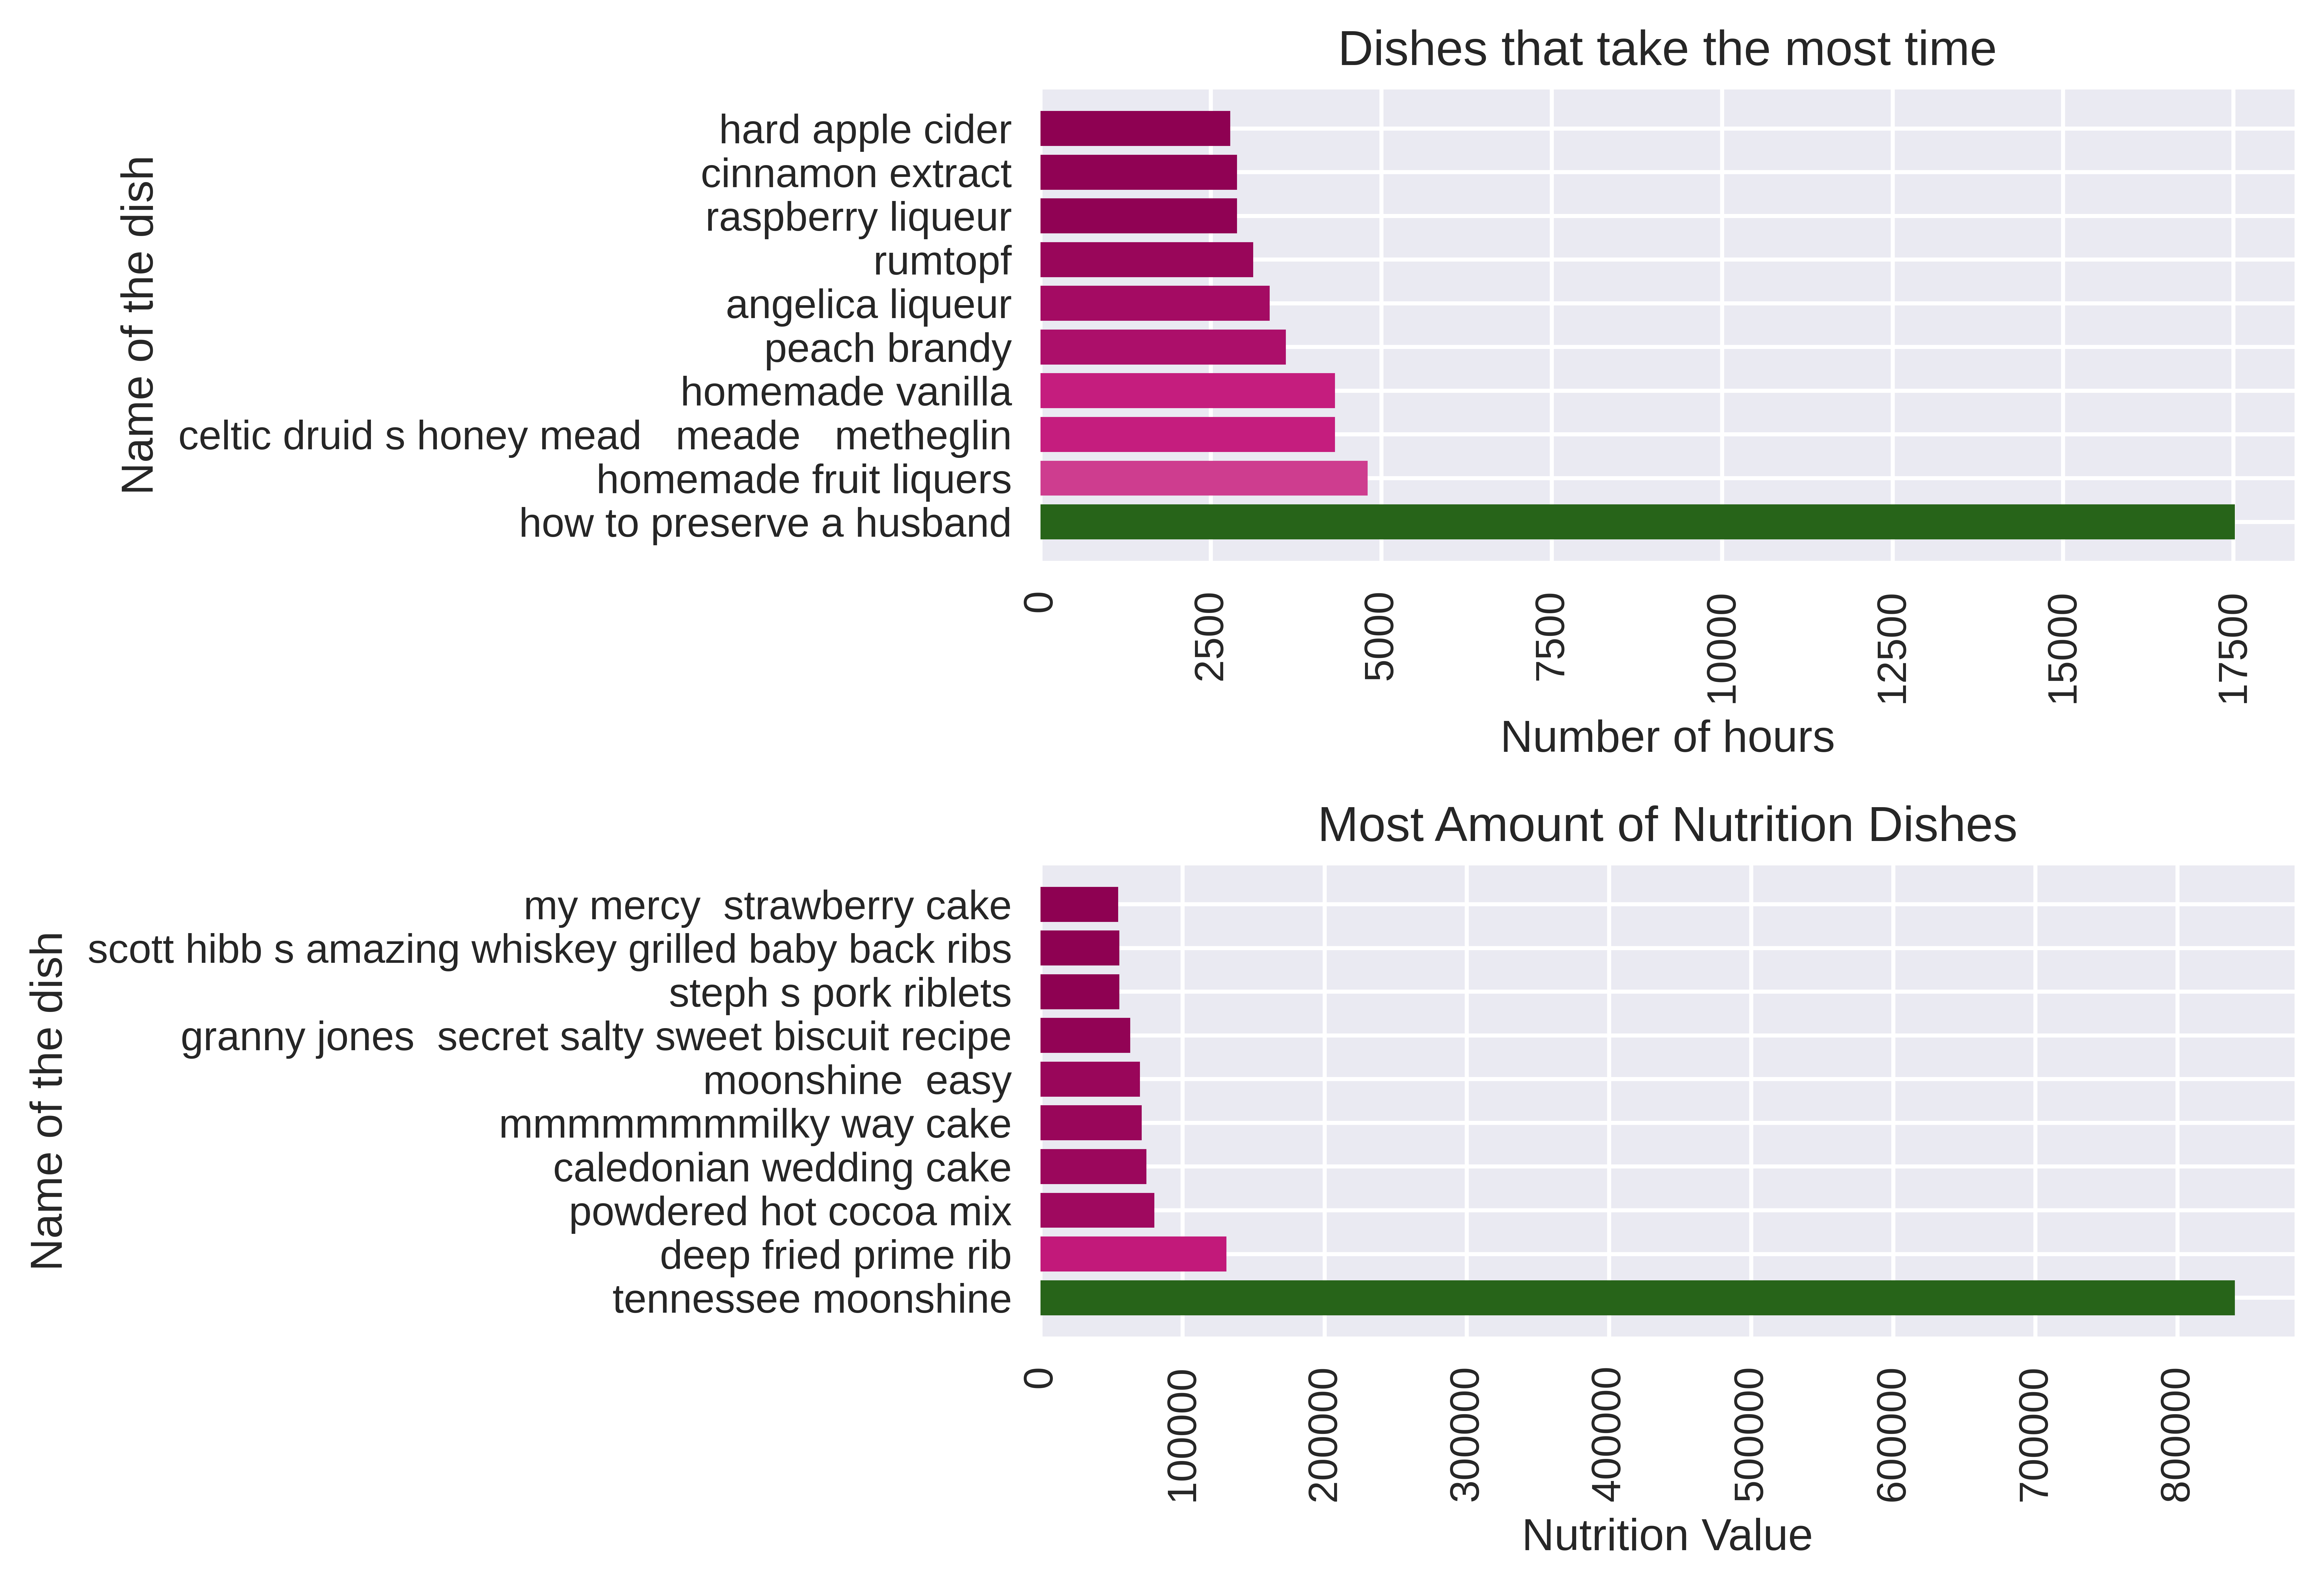

In [5]:
plt.rcParams['figure.dpi'] = 1000
plt.figure(facecolor='w')

plt.subplot(2,1,1)
X_value = list(most_time_dishes['name'])
Y_value = [ i/60 for i in list(most_time_dishes['minutes'])]
my_cmap = plt.get_cmap("PiYG")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(X_value,Y_value,color=my_cmap(rescale(Y_value)))
plt.xticks(rotation='90')
plt.xlabel("Number of hours")
plt.ylabel("Name of the dish")
plt.title("Dishes that take the most time")

plt.subplot(2,1,2)
X_value = list(most_nutrition_dishes['name'])
Y_value = list(most_nutrition_dishes['nutrition'])
my_cmap = plt.get_cmap("PiYG")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.barh(X_value,Y_value,color=my_cmap(rescale(Y_value)))
plt.xticks(rotation='90')
plt.xlabel("Nutrition Value")
plt.ylabel("Name of the dish")
plt.title("Most Amount of Nutrition Dishes")

plt.tight_layout()
plt.show()